In [1]:
!pip install -U accelerate
!pip install -U transformers

In [2]:
import pandas as pd
df =pd.read_csv('/content/scraped_news.csv')
df.head()

,headline,content
0,The year of newly minted Indian American GOP s...,When President-elect Donald Trump retakes the ...
1,Elon Musk courts Europe's surging far right,LONDON — Lawmakers in the United Kingdom are w...
2,Lara Trump says she's removed her name from co...,"Lara Trump, President-electDonald Trump's daug..."
3,Suspect in the German Christmas market attack ...,"Taleb al-Abdulmohsen, a50-year-old Saudi Arabi..."
4,"Scams, trolls and impersonators: Bluesky faces...","Government censorship, scam accounts, celebrit..."


In [3]:
df.shape

(73, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  73 non-null     object
 1   content   73 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [5]:
df.duplicated().sum()

0

<Axes: ylabel='Frequency'>

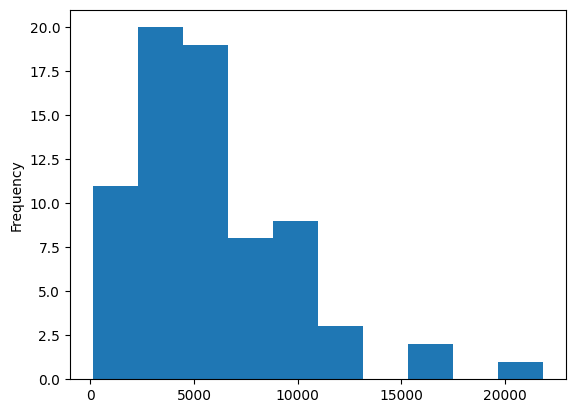

In [6]:
df['content'].str.len().plot.hist()

In [7]:
import random

# Define categories
categories = ['drama', 'politics', 'comedy', 'sports', 'technology',
              'health', 'entertainment', 'science', 'business', 'education']

# Simulate labels for each record
df['labels'] = df['content'].apply(lambda x: random.sample(categories, k=random.randint(1, 4)))


In [9]:
# Simplified approach: using truncation for summarization and keyword-based genre extraction

# Truncate content to the first 500 tokens
def truncate_text(text, max_length=500):
    words = text.split()
    return ' '.join(words[:max_length])

# Simple keyword-based genre extraction from the headline and content
def extract_genre_simplified(text):
    text_lower = text.lower()
    return [genre for genre in categories if genre in text_lower]

# Apply truncation and genre extraction
df['processed_content'] = df['content'].apply(lambda x: truncate_text(x, max_length=500))
df['genre'] = df.apply(lambda row: extract_genre_simplified(row['headline'] + ' ' + row['content']), axis=1)

# Display the updated dataframe's first few rows
df[['headline', 'content','processed_content', 'genre']].head()

,headline,content,processed_content,genre
0,The year of newly minted Indian American GOP s...,When President-elect Donald Trump retakes the ...,When President-elect Donald Trump retakes the ...,"[politics, education]"
1,Elon Musk courts Europe's surging far right,LONDON — Lawmakers in the United Kingdom are w...,LONDON — Lawmakers in the United Kingdom are w...,[politics]
2,Lara Trump says she's removed her name from co...,"Lara Trump, President-electDonald Trump's daug...","Lara Trump, President-electDonald Trump's daug...",[politics]
3,Suspect in the German Christmas market attack ...,"Taleb al-Abdulmohsen, a50-year-old Saudi Arabi...","Taleb al-Abdulmohsen, a50-year-old Saudi Arabi...",[drama]
4,"Scams, trolls and impersonators: Bluesky faces...","Government censorship, scam accounts, celebrit...","Government censorship, scam accounts, celebrit...","[technology, education]"


In [10]:
# Redefine the categories
categories = ['drama', 'politics', 'comedy', 'sports', 'technology', 'history','crime','religion'
              'health', 'entertainment', 'science', 'business', 'education','environment ']

# Re-run the processing steps
df['processed_content'] = df['content'].apply(lambda x: truncate_text(x, max_length=500))
df['genre'] = df.apply(lambda row: extract_genre_simplified(row['headline'] + ' ' + row['content']), axis=1)

# Display the updated dataframe's first few rows
df[['headline', 'processed_content', 'genre']].head()

,headline,processed_content,genre
0,The year of newly minted Indian American GOP s...,When President-elect Donald Trump retakes the ...,"[politics, education]"
1,Elon Musk courts Europe's surging far right,LONDON — Lawmakers in the United Kingdom are w...,[politics]
2,Lara Trump says she's removed her name from co...,"Lara Trump, President-electDonald Trump's daug...",[politics]
3,Suspect in the German Christmas market attack ...,"Taleb al-Abdulmohsen, a50-year-old Saudi Arabi...",[drama]
4,"Scams, trolls and impersonators: Bluesky faces...","Government censorship, scam accounts, celebrit...","[technology, education]"


<Axes: ylabel='Frequency'>

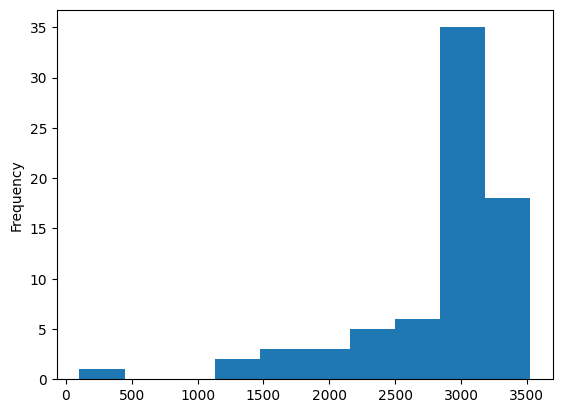

In [11]:
df['processed_content'].str.len().plot.hist()

In [12]:
df['genre'].value_counts()

,count
genre,
[],26
[business],6
[politics],5
[science],4
"[sports, history]",3
[drama],3
[history],2
"[drama, business]",2
"[sports, entertainment]",2


In [13]:
genre_counts =[g for gen in df['genre'] for g in gen]
genre_counts

['politics',
 'education',
 'politics',
 'politics',
 'drama',
 'technology',
 'education',
 'business',
 'business',
 'sports',
 'history',
 'entertainment',
 'drama',
 'entertainment',
 'environment ',
 'drama',
 'business',
 'drama',
 'business',
 'entertainment',
 'history',
 'education',
 'history',
 'science',
 'drama',
 'business',
 'politics',
 'business',
 'politics',
 'politics',
 'sports',
 'entertainment',
 'history',
 'science',
 'education',
 'sports',
 'history',
 'drama',
 'politics',
 'crime',
 'business',
 'business',
 'technology',
 'crime',
 'history',
 'business',
 'drama',
 'science',
 'science',
 'sports',
 'sports',
 'history',
 'science',
 'sports',
 'entertainment',
 'history',
 'science',
 'science',
 'drama',
 'history',
 'science',
 'history',
 'science',
 'education',
 'sports',
 'business',
 'education',
 'politics',
 'business',
 'drama',
 'crime',
 'sports',
 'history',
 'history',
 'drama',
 'comedy',
 'history',
 'crime',
 'business']

In [14]:
pd.Series(genre_counts).value_counts()

,count
history,13
business,12
drama,10
science,9
politics,8
sports,8
education,6
entertainment,5
crime,4
technology,2


# label encoder

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

In [16]:
multilabel = MultiLabelBinarizer()
labels = multilabel.fit_transform(df['genre']).astype('float32')
texts = df['processed_content'].tolist()

In [17]:
labels

array([[0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [18]:
texts[:5]

['When President-elect Donald Trump retakes the White House in January, he could be flanked by a large cohort of young Indian American stars. There’s Kash Patel, who could become Trump’s FBI director if he’s confirmed, and Vivek Ramaswamy, who with Elon Musk will lead a new nongovernmental project called the Department of Government Efficiency. Alongside them, with quieter public receptions, Harmeet Dhillon and Jay Bhattacharya prepare for potential key roles in the Department of Justice and the National Institutes of Health, respectively. And there’s Vice President-elect JD Vance’s wife, Usha Vance, who will be the first South Asian American second lady. These Indian Americans are perhaps the most well-represented minority group on the president-elect’s newly announced team. With this ethnic group making up less than 2% of the population and typically among themost Democraticof all Asian subgroups, many find it surprising. Others say the Indian American community has been poised to fi

# Model Building

In [19]:
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [20]:
train_texts,val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2,random_state=42)

In [21]:
checkpoint = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint,num_labels =len(labels[0]),problem_type ='multi_label_classification')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels,tokenizer,max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self,idx):
        text = str(self.texts[idx])
        label = torch.tensor(self.labels[idx])

        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_len, return_tensors='pt')

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': label
        }

In [24]:
train_dataset = CustomDataset(train_texts,train_labels,tokenizer)
val_dataset = CustomDataset(val_texts,val_labels,tokenizer)

In [25]:
train_dataset

In [26]:
val_dataset[0]

{'input_ids': tensor([  101,  2231, 15657,  1010,  8040,  3286,  6115,  1010,  8958, 17727,
         18617,  3370,  1010, 10398,  1998,  1037,  5310, 10073,  2058,  1037,
          4988,  5496,  1997,  5698,  6026,  9099,  2111,  1517,  2122,  2024,
          2074,  2070,  1997,  1996, 18608,  4320,  2011,  1996, 17235, 13013,
          2591,  2865,  4132,  5132,  4801,  1012,  2021,  2027,  1521,  2128,
          2036,  5751,  1997,  2049,  5915,  3930,  2144,  1996,  2602,  1012,
          2004,  5132,  4801, 17771,  2062,  4023,  1010,  3391,  2013,  2216,
         21031, 12377,  2290,  3449,  2239, 14163,  6711,  1521,  1055,  1060,
          1010,  2009,  2003,  5307,  1996,  3976,  1997,  3112,  1024,  7823,
          5549,  8156,  6567,  1998,  1037,  3652,  2193,  1997,  2919,  5889,
          1012,  3053,  2423,  2454,  2111,  2031,  2772,  2039,  2005,  1996,
          4132,  1010,  2429, 21269, 29392,  2609, 28837,  4801,  1012,  2096,
          2008,  2193,  2003,  2145,  1

In [27]:
#Multi-label Classification Evaluation Metrics

import numpy as np
from sklearn.metrics import roc_auc_score,f1_score,hamming_loss
from transformers import EvalPrediction
import torch


def multi_label_metrics(predictions, labels, threshold=0.3):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))

    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    y_true = labels

    f1=f1_score(y_true,y_pred,average='macro')
    roc_auc = roc_auc_score(y_true, y_pred,average='macro')
    hamming  = hamming_loss(y_true, y_pred)

    metrics ={
        'roc_auc':roc_auc,
        'f1':f1,
        'hamming':hamming
    }
    return metrics


def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,tuple)else p.predictions


    result = multi_label_metrics(predictions=preds, labels=p.label_ids)
    return result

In [28]:
#Training Arguments
from transformers import TrainingArguments,Trainer

args =TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size =16,
    output_dir ='./results',
    num_train_epochs=3,
    learning_rate=2e-5,
    save_steps=1000,
    save_total_limit=2
)

trainer =Trainer(model= model,args=args,train_dataset=train_dataset,eval_dataset=val_dataset,compute_metrics=compute_metrics)

In [29]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss


TrainOutput(global_step=24, training_loss=0.6095312833786011, metrics={'train_runtime': 116.782, 'train_samples_per_second': 1.49, 'train_steps_per_second': 0.206, 'total_flos': 5763359471616.0, 'train_loss': 0.6095312833786011, 'epoch': 3.0})

In [30]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


{'eval_loss': 0.5548897385597229,
 'eval_roc_auc': nan,
 'eval_f1': 0.14562908496732027,
 'eval_hamming': 0.9166666666666666,
 'eval_runtime': 0.4073,
 'eval_samples_per_second': 36.824,
 'eval_steps_per_second': 2.455,
 'epoch': 3.0}

In [32]:
trainer.save_model('news_genre_classifier_model')

In [33]:
import pickle
with open('multilabel_binarizer.pkl', 'wb') as f:
    pickle.dump(multilabel, f)

For downloading the model

In [34]:
!zip -r distilbert.zip "/content/news_genre_classifier_model"

  adding: content/news_genre_classifier_model/ (stored 0%)
  adding: content/news_genre_classifier_model/model.safetensors (deflated 8%)
  adding: content/news_genre_classifier_model/training_args.bin (deflated 51%)
  adding: content/news_genre_classifier_model/config.json (deflated 57%)


# Predictions

In [35]:
text='''I heard rumbling and shattering glass: Eyewitness describes Christmas market attack Reuters A woman who was with her boyfriend at the Christmas market in Magdeburg has told local media she had her boyfriend in her arms when the car used in the attack came speeding towards them.He was hit and pulled away from my side. It was terrible, 32-year-old Nadine told the Bild newspaper.Footage published on German media showed a black car striking a crowd of people at high speed and continuing to drive forward for hundreds of metres.Nadine's boyfriend is said to have sustained injuries to his leg and head.
Another eyewitness, Gianni Warzecha, told the BBC he was listening to Christmas music at the market with his girlfriend's family when "suddenly there was a rumbling and the sound of shattered glass".
"People began to panic," he said. "I saw the car and people on the floor, people bleeding. There were also kids.
"I was concentrating on getting first aid to people. It took a few minutes for the first paramedics to arrive but it wasn't enough because there were already 200 people hurt.
"Most of the first aid was done by people there."
Lars Frohmüller, a reporter for the public broadcaster MDR who arrived at the Christmas market in Magdeburg shortly after the attack, told the BBC about what he saw.
"Everywhere were ambulances, there were police, there were a lot of fire workers.
"This was a real chaotic situation. We saw blood on the floor, we saw people sitting beside each other and having golden and silver foils around them. And we saw many doctors trying to keep people warm and help them with their injuries.
"It's a big shock. It's a big shock for every people here in Magdeburg and for every person in Saxony-Anhalt."
'''

encoding = tokenizer(text, return_tensors='pt')
encoding.to(trainer.model.device)

outputs = trainer.model(**encoding)

In [36]:
sigmod =torch.nn.Sigmoid()
probs = sigmod(outputs.logits[0].cpu())
preds =np.zeros(probs.shape)
preds[np.where(probs >= 0.3)] = 1


multilabel.classes_

multilabel.inverse_transform(preds.reshape(1,-1))


[('business',
  'comedy',
  'crime',
  'drama',
  'education',
  'entertainment',
  'environment ',
  'history',
  'politics',
  'science',
  'sports',
  'technology')]

In [37]:
preds.reshape(1,-1)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])